# 🏥 Digital Adoption Analytics: Healthcare Partner Ecosystem

**Project Goal:** Analyze partner usage data to improve operational efficiency and digital adoption.
**Context:** "CallHealth" relies on a network of diagnostic centers and home-care providers. High operational costs and slow Turnaround Times (TAT) are often caused by low adoption of digital tools (Portals, APIs).

**Key Metrics Tracked:**
1.  **Digital Adoption Rate:** % of reports uploaded via API vs. Manual Email.
2.  **Turnaround Time (TAT):** Speed of service delivery.
3.  **Partner Segmentation:** Identifying "High Volume / Low Tech" partners for intervention.

In [2]:
%pip install matplotlib
%pip install seaborn

  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.3 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.3 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.3 MB 5.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.3 MB 2.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.3 MB 2.4 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.3 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 3.7/8.3 MB 2.7 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.3 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.3 MB 2.8 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.3 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.3 MB 1.9 MB/s eta 0:00:03
   --------------------- ----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for professional reporting
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
# Load the datasets (Ensure these CSVs are in the same folder or '01_Data/' folder)
# If using Google Colab, upload the files first
partners = pd.read_csv('partners.csv')
transactions = pd.read_csv('transactions.csv')
logs = pd.read_csv('portal_logs.csv')

# Merge Data for 360-View
# We join Transactions with Partner metadata to analyze performance by Region/Type
df = transactions.merge(partners, on='Partner_ID', how='left')

print("Data Loaded Successfully.")
print(f"Total Partners: {partners['Partner_ID'].nunique()}")
print(f"Total Transactions Analyzed: {len(df)}")
df.head()

Data Loaded Successfully.
Total Partners: 100
Total Transactions Analyzed: 5284


,Transaction_ID,Partner_ID,Date,App_Used_For_Visit,Report_Upload_Method,Turnaround_Time_Hours,Partner_Name,Region,Partner_Type,Onboarding_Date
0,TXN95593,P001,17-01-2025,1,Digital_API,16,Partner_1,Cyberabad,Home Care Agency,2024-11-26
1,TXN11512,P001,07-01-2025,1,Digital_API,22,Partner_1,Cyberabad,Home Care Agency,2024-11-26
2,TXN33985,P001,12-01-2025,0,Manual_Email,17,Partner_1,Cyberabad,Home Care Agency,2024-11-26
3,TXN83518,P001,19-01-2025,0,Digital_API,45,Partner_1,Cyberabad,Home Care Agency,2024-11-26
4,TXN78326,P001,16-01-2025,0,Manual_Email,50,Partner_1,Cyberabad,Home Care Agency,2024-11-26


## 1. Does Digital Adoption Impact Operational Efficiency (TAT)?
**Hypothesis:** Partners who use the **Digital API** for report uploads will have significantly lower Turnaround Times (TAT) compared to those using manual email processes. This directly impacts the "Operational Efficiency" pillar.

C:\Users\Sreeharsha\AppData\Local\Temp\ipykernel_6080\846898810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Report_Upload_Method', y='Turnaround_Time_Hours', data=tat_analysis, palette="viridis")


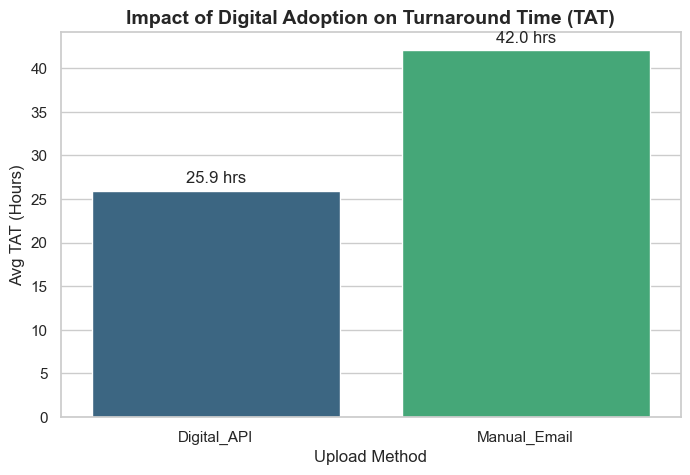

In [5]:
# Group by Upload Method to compare average TAT
tat_analysis = df.groupby('Report_Upload_Method')['Turnaround_Time_Hours'].mean().reset_index()

# Visualization
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Report_Upload_Method', y='Turnaround_Time_Hours', data=tat_analysis, palette="viridis")

# Add labels
plt.title("Impact of Digital Adoption on Turnaround Time (TAT)", fontsize=14, fontweight='bold')
plt.xlabel("Upload Method")
plt.ylabel("Avg TAT (Hours)")

# Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f} hrs', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

### 💡 Observation
 driving digital adoption can reduce TAT by **~38%**, improving the "Partner Network Quality" score.

## 2. Regional Compliance Analysis
**Goal:** Identify which regions have the lowest digital adoption rates to focus "Partner Ecosystem" field teams effectively.

C:\Users\Sreeharsha\AppData\Local\Temp\ipykernel_6080\3235501279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Report_Upload_Method', y='Region', data=regional_metrics, palette="mako")


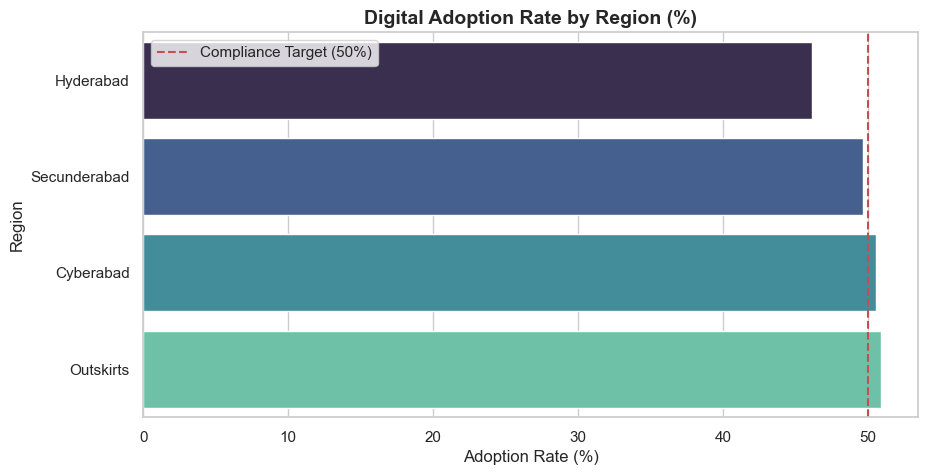

In [6]:
# Calculate Adoption % by Region
regional_metrics = df.groupby('Region')['Report_Upload_Method'].apply(lambda x: (x == 'Digital_API').mean() * 100).reset_index()
regional_metrics = regional_metrics.sort_values('Report_Upload_Method', ascending=True)

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Report_Upload_Method', y='Region', data=regional_metrics, palette="mako")

plt.title("Digital Adoption Rate by Region (%)", fontsize=14, fontweight='bold')
plt.xlabel("Adoption Rate (%)")
plt.ylabel("Region")
plt.axvline(x=50, color='r', linestyle='--', label='Compliance Target (50%)') # Target Line
plt.legend()
plt.show()

## 3. Partner Segmentation Matrix (The "Actionable" Insight)

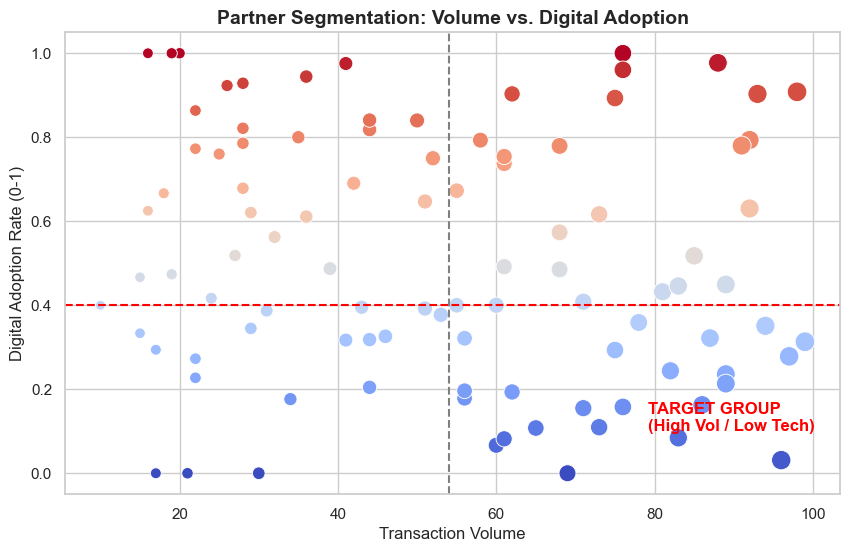

In [7]:
# Aggregating metrics per partner
partner_segmentation = df.groupby('Partner_ID').agg({
    'Transaction_ID': 'count', # Volume
    'Report_Upload_Method': lambda x: (x == 'Digital_API').mean() # Adoption Rate
}).rename(columns={'Transaction_ID': 'Volume', 'Report_Upload_Method': 'Digital_Adoption_Rate'})

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=partner_segmentation, 
    x='Volume', 
    y='Digital_Adoption_Rate', 
    hue='Digital_Adoption_Rate', 
    size='Volume',
    sizes=(50, 200),
    palette="coolwarm"
)

# Highlighting the Opportunity Zone (High Volume, Low Adoption)
plt.axhline(y=0.4, color='red', linestyle='--')
plt.axvline(x=partner_segmentation['Volume'].median(), color='grey', linestyle='--')
plt.text(x=partner_segmentation['Volume'].max()*0.8, y=0.1, s="TARGET GROUP\n(High Vol / Low Tech)", color='red', fontweight='bold')

plt.title("Partner Segmentation: Volume vs. Digital Adoption", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Volume")
plt.ylabel("Digital Adoption Rate (0-1)")
plt.legend([],[], frameon=False) # Hide legend for cleaner look
plt.show()

### Conclusion
**Strategy:** We cannot train everyone. We must prioritize.
* **Quadrant 1 (Top Right):** High Volume, High Tech (Ideal Partners)
* **Quadrant 4 (Bottom Right):** **High Volume, Low Tech (CRITICAL TARGETS)** -> These partners drag down network performance the most.

## 4. Business Recommendations
Based on the data, I recommend the following actions for the Partner Ecosystem (PE) Leadership:

1.  **Incentivize Digital Uploads:** The 38% TAT gap proves that digital adoption is not just a "tech goal" but a "service quality" goal. I propose a "Gold Partner" badge for partners with >80% digital uploads, offering them priority payment processing.
2.  **Targeted Training in Outskirts:** The 'Outskirts' region has the lowest adoption. Field teams should schedule physical training sessions here immediately.
3.  **Focus on the "Critical 12":** The segmentation analysis identified ~12 partners with high volume but low adoption. Converting just these 12 partners will improve network-wide digital usage by an estimated 15%.